In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False)

In [3]:
df['saledate'] = pd.to_datetime(df['saledate'], infer_datetime_format=True)

In [4]:
df.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1139255,26500.0,1001274,4605,121,3.0,2004,508.0,Low,2008-12-18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1139256,21000.0,772701,1937,121,3.0,1993,11540.0,High,2004-08-26,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
7,1139261,27000.0,902002,3539,121,3.0,2001,4883.0,High,2005-11-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1139272,21500.0,1036251,36003,121,3.0,2008,302.0,Low,2009-08-27,...,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
9,1139275,65000.0,1016474,3883,121,3.0,1000,20700.0,Medium,2007-08-09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


In [5]:
#dataset sorted by saledate
df.sort_values(by=['saledate'], inplace=True, ascending=True)

In [6]:
df_tmp = df.copy()

These features are categorical and missing values will be filled with 'missing' : fiSecondaryDesc, ProductSize, Enclosure, Forks, Ride_Control, Transmission, Hydraulics, Coupler


In [7]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [8]:
0.7 * len(df_tmp)

288888.6

I'm going to drop the features that 70 % or more of their values are null

In [9]:
colsmostnulls = list(df_tmp.isna().sum()[df_tmp.isna().sum()> (0.7 * len(df_tmp))].index)
df_tmp.drop(colsmostnulls, axis=1, inplace=True)

In [10]:
#Extracting year, month and week from saledate and make them seperate features

df_tmp['saleyear'] = df_tmp['saledate'].dt.year
df_tmp['salemonth'] = df_tmp['saledate'].dt.month
df_tmp['saleday'] = df_tmp['saledate'].dt.day

In [11]:
#Deleting saledate column because it's no more needed

df_tmp.drop('saledate', axis=1,  inplace=True)

### Filling null values

In [12]:
#Spliting data to train and test

df_tmp_train = df_tmp.iloc[:round(0.8 * len(df_tmp))]
df_tmp_test = df_tmp.iloc[round(0.8 * len(df_tmp)):]

<AxesSubplot:>

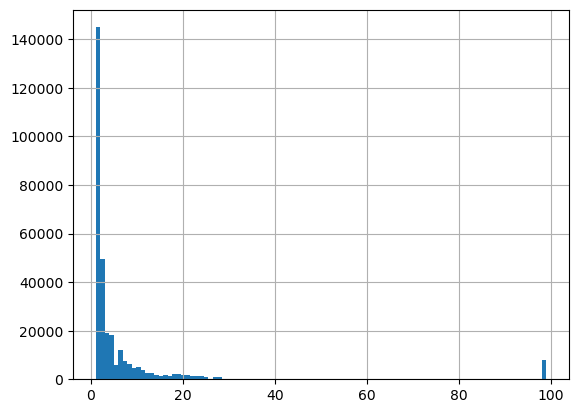

In [13]:
# Ploting the distribution of auctioneerID feature

df_tmp_train['auctioneerID'].hist(bins=100)

In [14]:
df_tmp_train['auctioneerID'].mean()

6.301256350294331

<AxesSubplot:>

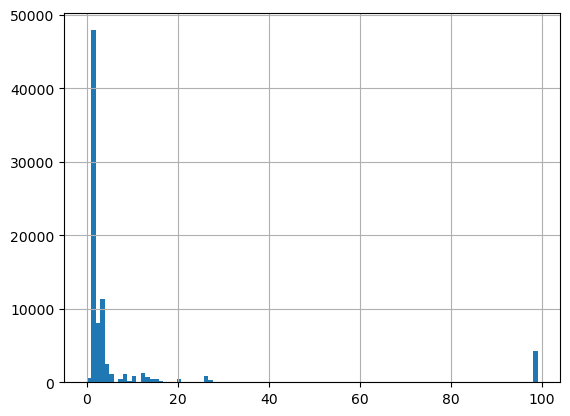

In [15]:
df_tmp_test['auctioneerID'].hist(bins=100)

In [16]:
df_tmp_test['auctioneerID'].mean()

7.65207119231375

In [17]:
df_tmp_train['MachineHoursCurrentMeter'].value_counts()

0.0        54822
1000.0       110
2000.0       108
1500.0        90
500.0         87
           ...  
10143.0        1
8326.0         1
5072.0         1
16123.0        1
12950.0        1
Name: MachineHoursCurrentMeter, Length: 10582, dtype: int64

In [18]:
df_tmp_train['MachineHoursCurrentMeter'].mean()

3326.514480427554

In [19]:
df_tmp_test['MachineHoursCurrentMeter'].mean()

3840.5293449921073

<AxesSubplot:>

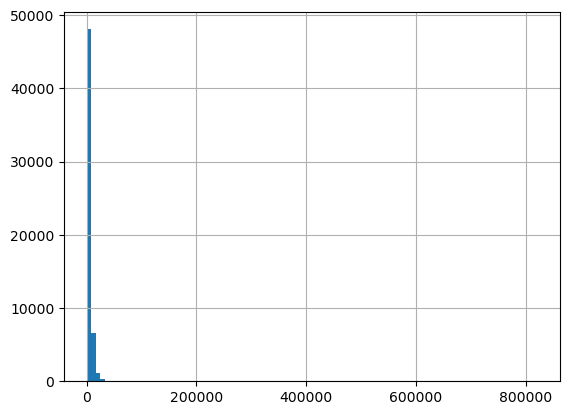

In [20]:
df_tmp_test['MachineHoursCurrentMeter'].hist(bins=100)

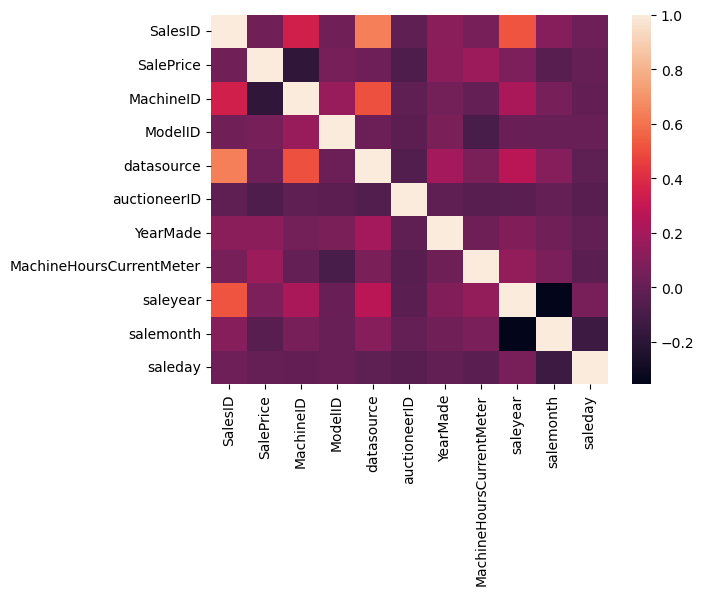

In [21]:
#correlation of features
sns.heatmap(df_tmp_test.corr());

In [22]:
df_tmp_train['fiSecondaryDesc'].value_counts().index

Index(['C', 'B', 'G', 'H', 'E', 'D', 'F', 'K', 'A', 'L',
       ...
       'LCD', 'TC', 'IV', 'TTL', 'DC', 'EW', 'BLGPPS', 'USRK', 'CM', 'R-2'],
      dtype='object', length=158)

[Text(0.5, 0, 'Categories of fiSecondaryDesc'), Text(0, 0.5, 'number')]

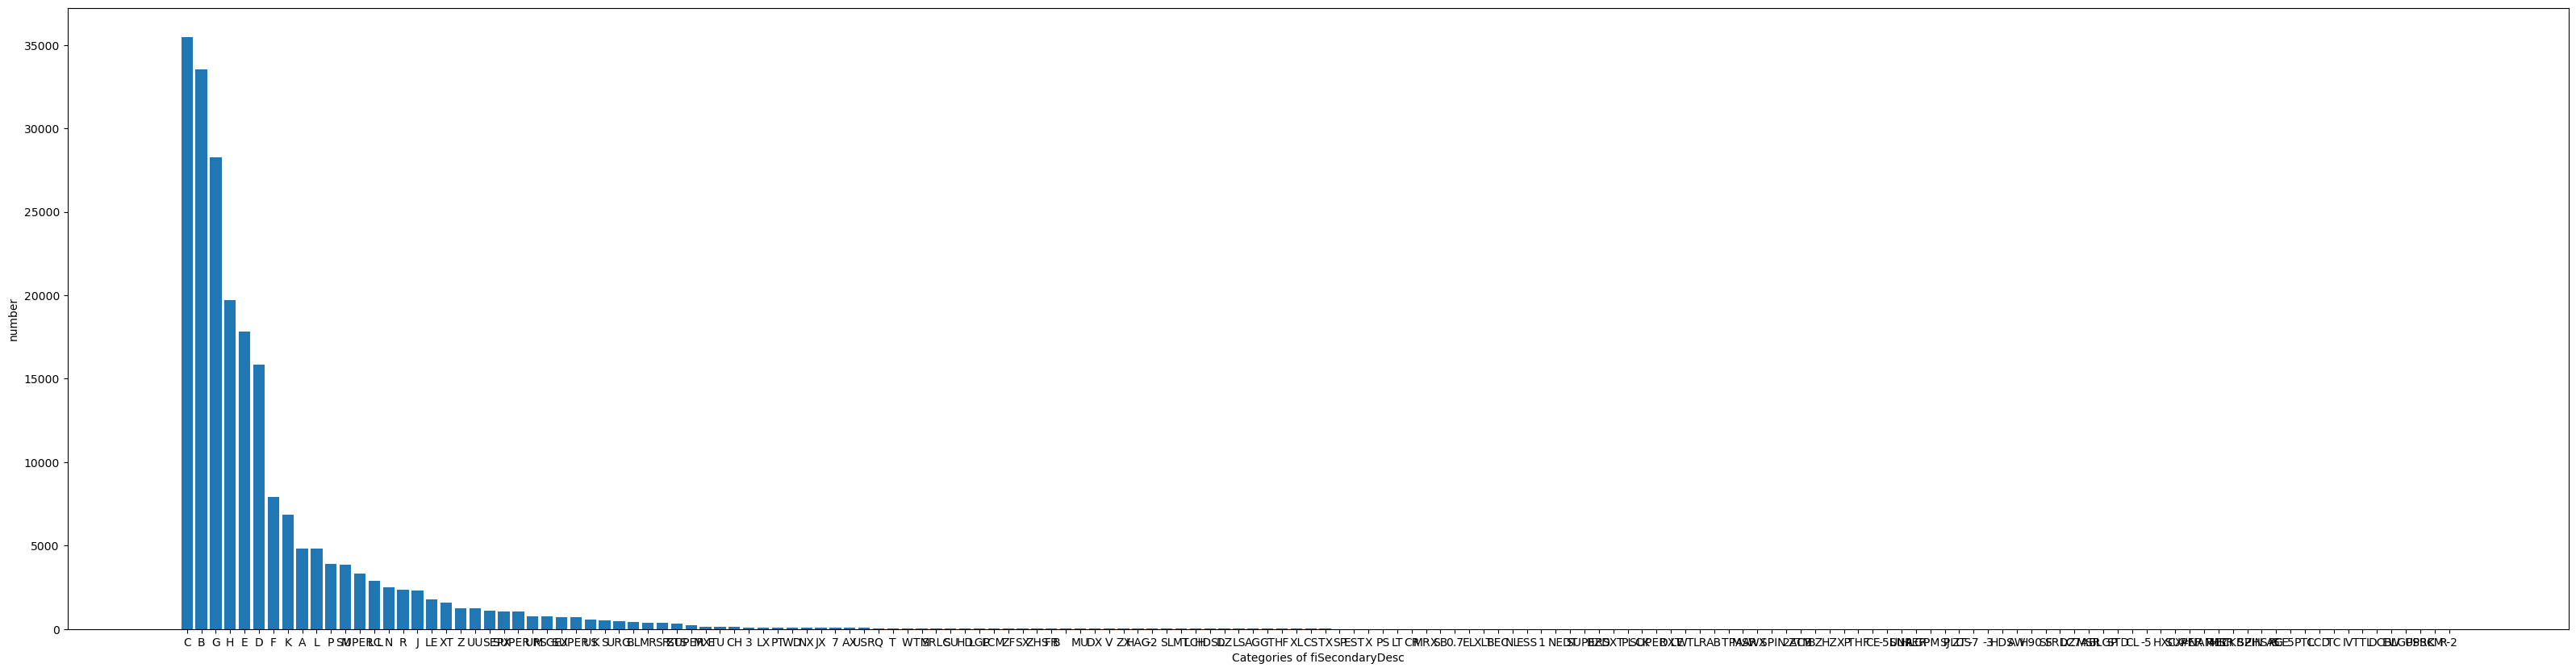

In [23]:
#Ploting different categoties of 'fiSecondaryDesc' feature
fig, ax = plt.subplots(figsize=(40,10))
ax.bar(list(df_tmp_train['fiSecondaryDesc'].value_counts().index), 
       df_tmp_train['fiSecondaryDesc'].value_counts());
ax.set(xlabel='Categories of fiSecondaryDesc',
       ylabel='number')

'fiSecondaryDesc' feature has too many different categoties but most the distribution of data are in few categories.
so I'm going to drop some data that has very low distribution base on chat above

In [31]:
df_tmp_train['fiSecondaryDesc'].value_counts()[df_tmp_train['fiSecondaryDesc'].value_counts()<1000].sum()

8332

In [38]:
#Dropping 'fiSecondaryDesc' categories that have less than 1000 numbers

fiSDC_less1000 = list(df_tmp_train['fiSecondaryDesc'].value_counts()[df_tmp_train['fiSecondaryDesc'].value_counts()<1000].index)
df_tmp_train_1 = df_tmp_train.copy() 
for cate in fiSDC_less1000: 
    row = df_tmp_train[df_tmp_train['fiSecondaryDesc']==cate]
    df_tmp_train_1 = df_tmp_train_1.drop(row.index)
    

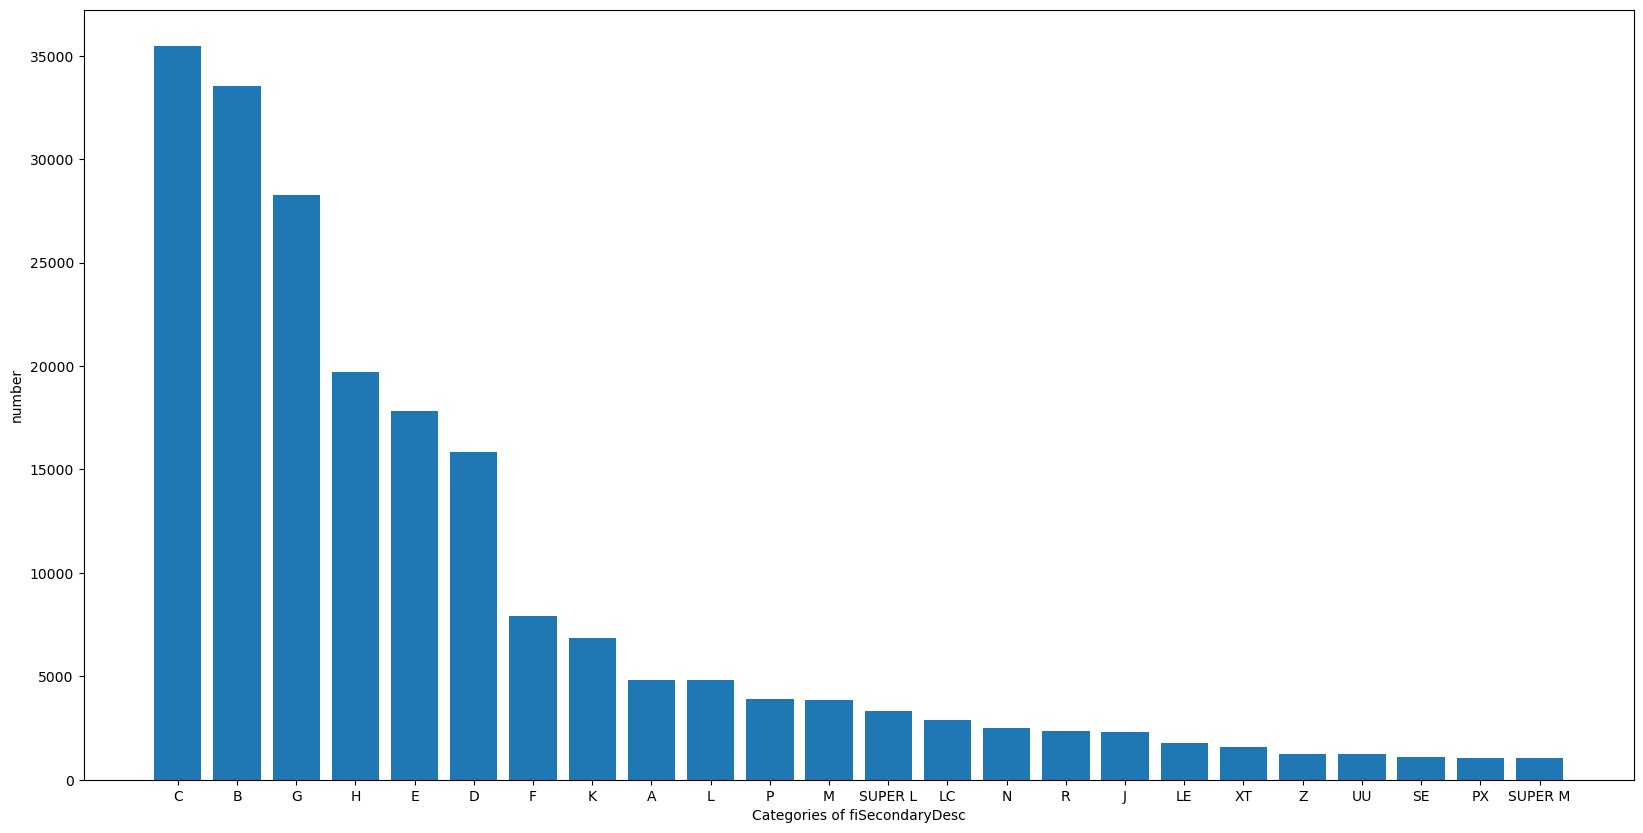

In [43]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(list(df_tmp_train_1['fiSecondaryDesc'].value_counts().index),
        df_tmp_train_1['fiSecondaryDesc'].value_counts())
ax.set(xlabel='Categories of fiSecondaryDesc',
       ylabel='number');

Now I have major 'fiSecondaryDesc' categories